In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import seaborn as sns
import logging

FORMAT = "%(asctime)s %(message)s"

logging.basicConfig(level="INFO", format=FORMAT, datefmt="%d-%b-%y %H:%M:%S")
sns.set_context("talk")

In [3]:
epoch_key = ("peanut", 14, 4)  # animal, day, epoch

In [4]:
from dask.distributed import Client

# for typhoon
client = Client(n_workers=48, threads_per_worker=2, processes=True)

client

Client Scheduler: tcp://127.0.0.1:39556 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 48 Cores: 96 Memory: 404.32 GB


In [5]:
from src.load_data import load_data

data = load_data(epoch_key)

19-Feb-21 09:17:52 Loading position information and linearizing...
19-Feb-21 09:17:56 Loading multiunits...
19-Feb-21 09:18:16 Loading sorted spikes...


In [6]:
logging.info("Done...")

19-Feb-21 09:35:53 Done...


In [7]:
data["neuron_info"].area.value_counts()

OFC     222
mPFC    133
CA1      51
Name: area, dtype: int64

In [8]:
continuous_transition_types = [["random_walk", "uniform"], ["uniform", "uniform"]]


classifier_parameters = {
    "movement_var": 6.0,
    "replay_speed": 1,
    "place_bin_size": 2.5,
    "continuous_transition_types": continuous_transition_types,
    "discrete_transition_diag": 0.968,
    "knot_spacing": 8,
    "spike_model_penalty": 0.5,
}

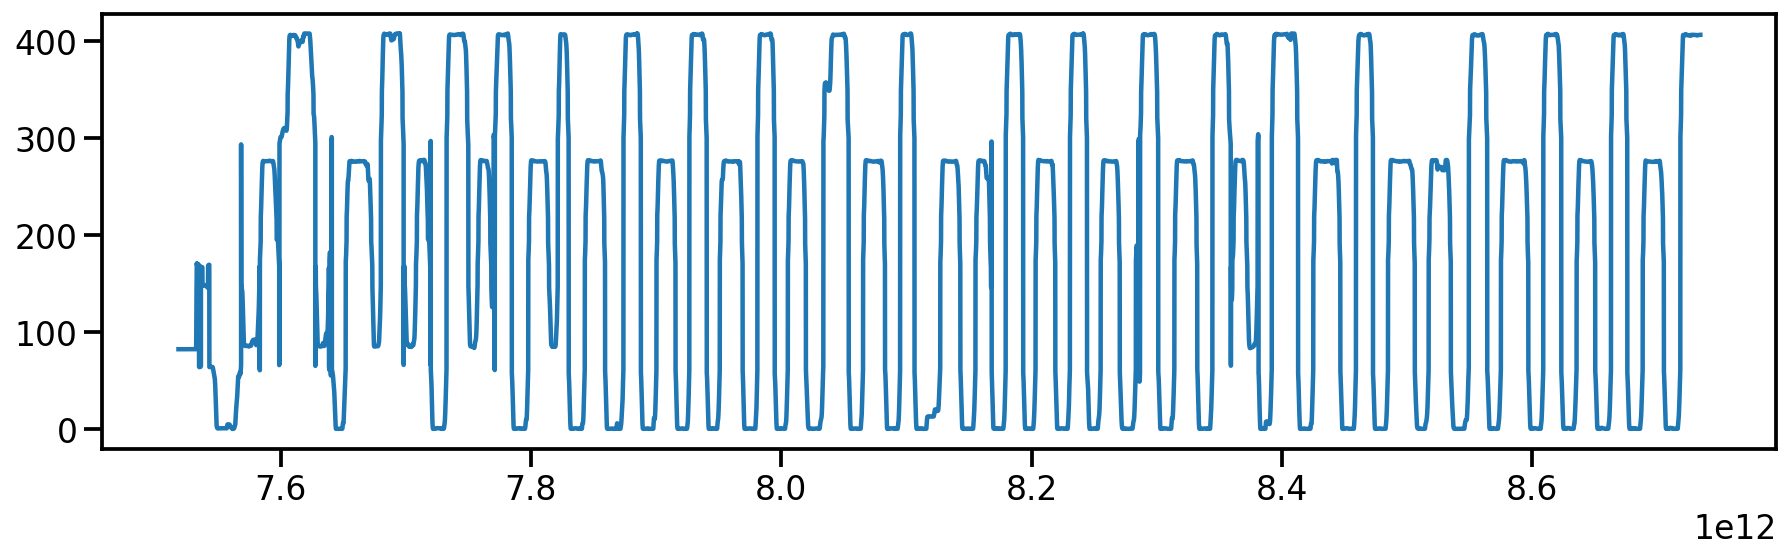

In [9]:
plt.figure(figsize=(15, 4))
plt.plot(data["position_info"]["linear_position"])

In [10]:
p_temp = (
    "/stelmo/jguidera/decoding/clusterless_decoding/temporary_fix_code_from_Dropbox"
)
os.chdir(p_temp)

from parse_trajectories_for_clusterless_decoding import *
from load_hardcode import *

On recording: peanut_day14_epoch4
fork_Haight_left
{'var_names_dict': {'position_x': 'x_position', 'position_y': 'y_position', 'speed': 'speed', 'direction': 'head_direction'}, 'shift_x_indices_from_well_period_stop_to_get_trajectory_start': 80, 'shift_x_indices_from_well_period_start_to_get_trajectory_stop': 80, 'epoch_boundaries_dict': None, 'minimum_samples_trajectory_wellPeriod': 10, 'ROIs': {'handle_well': {'position_x': [34, 75], 'position_y': [135, 175]}, 'center_well': {'position_x': [45, 74], 'position_y': [24, 61]}, 'right_well': {'position_x': [12.5, 45], 'position_y': [24, 61]}, 'left_well': {'position_x': [74, 108], 'position_y': [24, 61]}}}
Finding spans of consecutive integers in increasing list. NOTE: Lone integers will be included!
Spans of consecutive integers: {'values': [(25798, 31927), (55300, 59750), (77762, 80503), (90804, 94518), (116126, 119159), (148547, 151179), (427350, 430701)], 'indices': [(0, 6129), (6130, 10580), (10581, 13322), (13323, 17037), (17038, 2

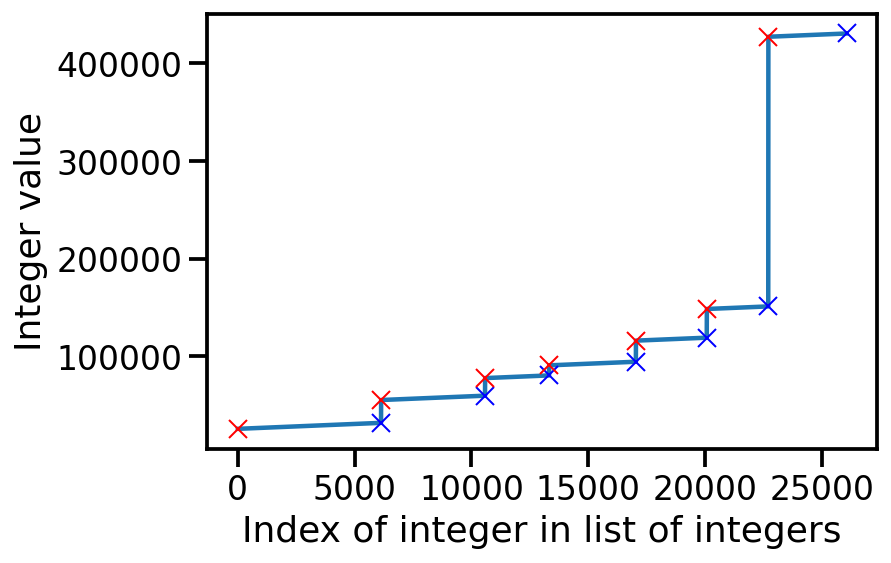

Finding spans of consecutive integers in increasing list. NOTE: Lone integers will be included!
Spans of consecutive integers: {'values': [(14877, 23369), (62367, 66333), (101207, 106719), (133536, 139349), (156250, 161943), (170780, 177380), (185065, 190595), (198915, 203735), (211385, 215882), (225707, 230950), (238566, 243040), (251076, 257157), (268091, 273085), (282654, 287944), (294356, 303744), (312701, 317998), (325148, 330103), (337773, 341999), (350597, 355729), (363468, 368018), (376388, 382028), (391781, 397429), (407327, 412626), (431754, 436355), (447568, 452933), (464463, 470023), (477516, 482776), (494232, 498997), (508685, 514985), (523210, 527826), (539617, 544779), (552763, 558056), (566360, 571840), (579120, 584477), (593735, 599533)], 'indices': [(0, 8492), (8493, 12459), (12460, 17972), (17973, 23786), (23787, 29480), (29481, 36081), (36082, 41612), (41613, 46433), (46434, 50931), (50932, 56175), (56176, 60650), (60651, 66732), (66733, 71727), (71728, 77018), (770

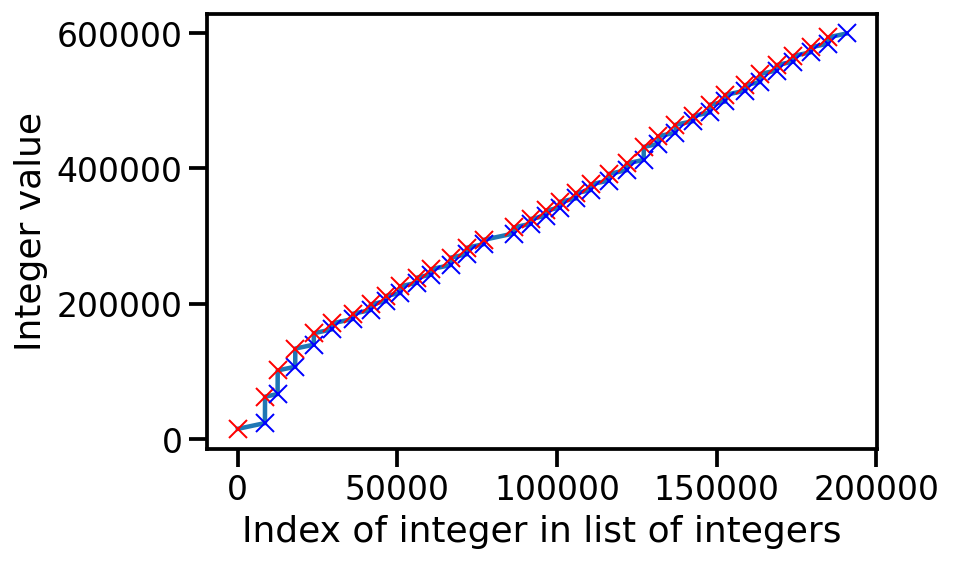

Finding spans of consecutive integers in increasing list. NOTE: Lone integers will be included!
Spans of consecutive integers: {'values': [(33224, 38683), (67516, 76556), (95593, 99234), (120164, 124217), (140402, 147291), (162987, 169768), (191570, 197903), (216835, 224709), (244053, 249985), (274069, 281591), (304954, 311655), (319105, 323817), (343006, 349576), (369046, 375317), (398463, 406290), (421824, 426196), (453979, 463450), (483830, 493149), (500147, 507539), (528907, 538462), (559150, 565174), (585559, 592584)], 'indices': [(0, 5459), (5460, 14500), (14501, 18142), (18143, 22196), (22197, 29086), (29087, 35868), (35869, 42202), (42203, 50077), (50078, 56010), (56011, 63533), (63534, 70235), (70236, 74948), (74949, 81519), (81520, 87791), (87792, 95619), (95620, 99992), (99993, 109464), (109465, 118784), (118785, 126177), (126178, 135733), (135734, 141758), (141759, 148784)]}


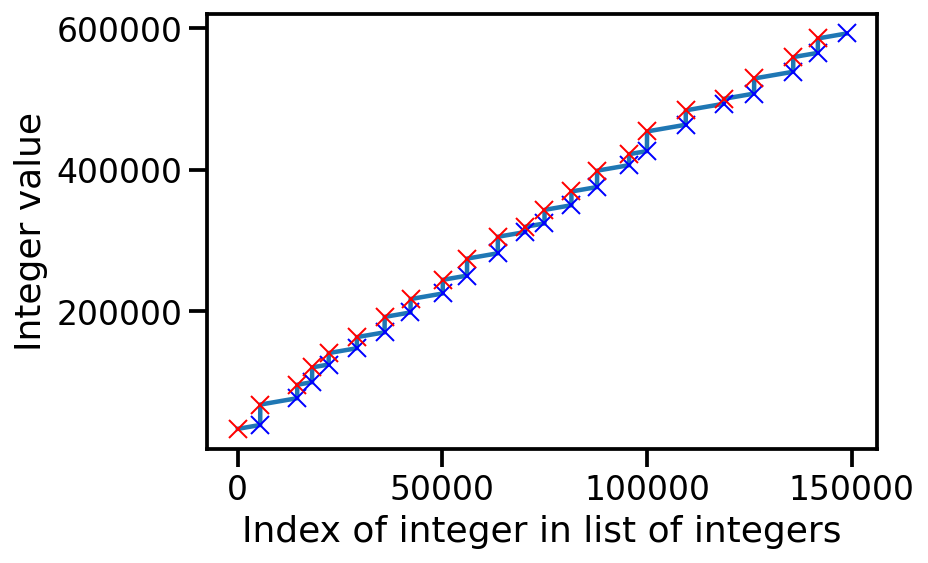

Finding spans of consecutive integers in increasing list. NOTE: Lone integers will be included!
Spans of consecutive integers: {'values': [(43991, 50416), (50888, 51505), (51581, 53168), (81543, 87278), (88027, 89151), (107709, 114996), (127157, 132441), (152226, 155218), (178369, 184045), (204650, 210348), (231826, 237536), (260553, 266940), (288852, 293345), (331078, 336780), (356715, 362257), (384832, 390601), (413573, 419320), (437311, 446543), (470973, 476458), (516317, 521991), (545840, 551613), (572849, 577988), (600560, 607872)], 'indices': [(0, 6425), (6426, 7043), (7044, 8631), (8632, 14367), (14368, 15492), (15493, 22780), (22781, 28065), (28066, 31058), (31059, 36735), (36736, 42434), (42435, 48145), (48146, 54533), (54534, 59027), (59028, 64730), (64731, 70273), (70274, 76043), (76044, 81791), (81792, 91024), (91025, 96510), (96511, 102185), (102186, 107959), (107960, 113099), (113100, 120412)]}


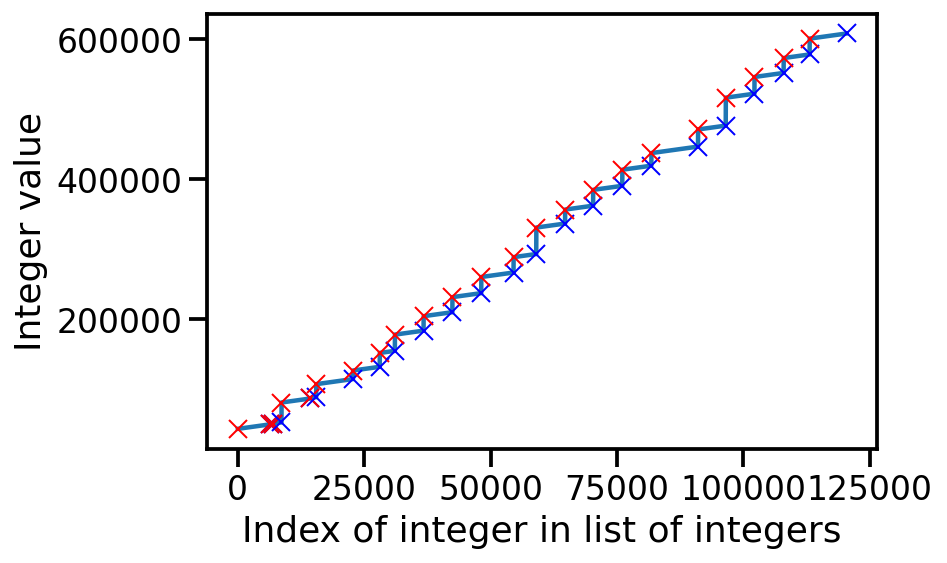

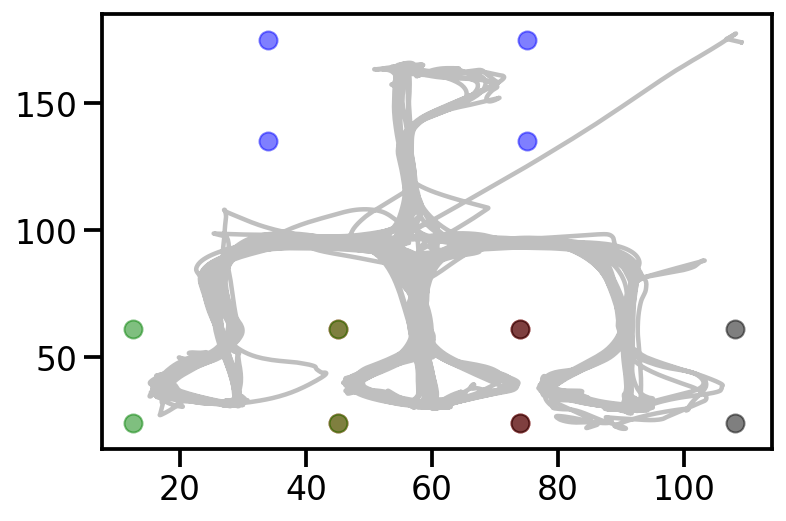

In [11]:
name_date_epoch_string = (
    epoch_key[0] + "_day" + str(epoch_key[1]) + "_epoch" + str(epoch_key[2])
)

environment = load_hardcode(
    switch_load_what="environment", name_date_epoch_string=name_date_epoch_string
)

var_names_dict = {
    "position_x": "x_position",
    "position_y": "y_position",
    "speed": "speed",
    "direction": "head_direction",
}

trajectory_dict = parse_trajectories_main(
    rat_name=epoch_key[0],
    name_date_epoch_string=name_date_epoch_string,
    environment=environment,
    var_names_dict=var_names_dict,
    pos_df_temp=data["position_info"],
)

In [12]:
data["position_info"]

,x_position,y_position,head_direction,speed,linear_position,track_segment_id,projected_x_position,projected_y_position
time,,,,,,,,
0 days 02:05:18.441913368,109.049800,174.051100,NaN,7.592114e-13,82.086213,0,55.200000,167.000000
0 days 02:05:18.443913368,109.049800,174.051100,NaN,7.121057e-13,82.086213,0,55.200000,167.000000
0 days 02:05:18.445913368,109.049800,174.051100,NaN,6.650000e-13,82.086213,0,55.200000,167.000000
0 days 02:05:18.447913368,109.049800,174.051100,NaN,6.178943e-13,82.086213,0,55.200000,167.000000
0 days 02:05:18.449913368,109.049800,174.051100,NaN,5.707886e-13,82.086213,0,55.200000,167.000000
...,...,...,...,...,...,...,...,...
0 days 02:25:34.177913368,90.700378,30.386240,-1.304747,1.680416e+00,406.273744,1,91.308482,30.382510
0 days 02:25:34.179913368,90.696961,30.385393,-1.303902,1.691834e+00,406.274612,1,91.308476,30.381641
0 days 02:25:34.181913368,90.693544,30.384546,-1.303056,1.703252e+00,406.275480,1,91.308471,30.380773


In [13]:
def reverse_dir(x):
    return 1 - x

In [14]:
def forward_dir(x):
    return x

In [15]:
edge_distance_dict = {"vertical": 725, "horizontal": 422.5}

In [16]:
def return_seg_dict(edges_names_list, edges_num_list, direction_list):

    dict_temp = {}  # intialize dictionary

    # To know how much to scale linear position values along edges, need to find total length of path made of edges
    total_path_distance = np.sum([edge_distance_dict[i] for i in edges_names_list])

    shift_temp = 0  # initialize shift
    for index_edge_temp, (edge_name_temp, edge_num_temp, direction_temp) in enumerate(
        zip(edges_names_list, edges_num_list, direction_list)
    ):  # for each edge
        dict_temp[edge_num_temp] = dict()  # initialize dictionary
        dict_temp[edge_num_temp]["direction"] = direction_temp  # store direction
        dict_temp[edge_num_temp][
            "shift"
        ] = shift_temp  # store shift (sum of lengths of all previous edges)
        dict_temp[edge_num_temp]["scale"] = (
            edge_distance_dict[edge_name_temp] / total_path_distance
        )
        shift_temp += (
            edge_distance_dict[edge_name_temp] / total_path_distance
        )  # add to shift the length of current edge

    return dict_temp

In [17]:
task_phase_lin_pos_dict = {
    # On task
    # Center
    ("right_well", "center_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[2, 4, 3],
        direction_list=[reverse_dir] * 3,
    ),
    ("center_well", "right_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[3, 4, 2],
        direction_list=[forward_dir] * 3,
    ),
    ("left_well", "center_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[1, 5, 3],
        direction_list=[reverse_dir] * 3,
    ),
    ("center_well", "left_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[3, 5, 1],
        direction_list=[forward_dir] * 3,
    ),
    # Handle
    ("right_well", "handle_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[2, 4, 0],
        direction_list=[reverse_dir] * 3,
    ),
    ("handle_well", "right_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[0, 4, 2],
        direction_list=[forward_dir] * 3,
    ),
    ("left_well", "handle_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[1, 5, 0],
        direction_list=[reverse_dir] * 3,
    ),
    ("handle_well", "left_well"): return_seg_dict(
        edges_names_list=["vertical", "horizontal", "vertical"],
        edges_num_list=[0, 5, 1],
        direction_list=[forward_dir] * 3,
    ),
}

In [18]:
# Store starts and ends of edges in terms of linear position

from track_linearization.utils import plot_graph_as_1D
from src.parameters import EDGE_ORDER, EDGE_SPACING

edge_order = EDGE_ORDER
edge_spacing = EDGE_SPACING

edges_dict = dict()  # initialize dictionary

track_graph = data["track_graph"]

n_edges = len(edge_order)
if isinstance(edge_spacing, int) | isinstance(edge_spacing, float):
    edge_spacing = [
        edge_spacing,
    ] * (n_edges - 1)

start_node_linear_position = 0

for ind, edge in enumerate(edge_order):
    end_node_linear_position = (
        start_node_linear_position + track_graph.edges[edge]["distance"]
    )

    edge_num = [i for i, e in enumerate(track_graph.edges) if set(e) == set(edge)][0]
    edges_dict[edge_num] = {
        "start": start_node_linear_position,
        "end": end_node_linear_position,
    }

    try:
        start_node_linear_position += (
            track_graph.edges[edge]["distance"] + edge_spacing[ind]
        )
    except IndexError:
        pass

In [19]:
# Make list with task phase entries
# Gets task phase: position samples that are part of a path trajectory and on edges that make up path
# Gets -15: position samples that are not part of a path trajectory (this includes when rat is at well) TODO: also specify speed filter
# Gets None: position samples that are part of a path trajectory but NOT on edges that make up path

# Set all values to -15. Afterwards, insert None or task phase number for each trajectory sample
#    data["position_info"].insert(8, "task_phase", [-15] * len(data["position_info"]))
data["position_info"]["task_phase"] = [1.1] * len(data["position_info"])

for path_name_temp, trajectory_start_end_indices_list_temp in trajectory_dict[
    name_date_epoch_string
][
    "trajectory_start_end_indices_in_pos_df"
].items():  # for each trajectory

    for i_s, i_e in trajectory_start_end_indices_list_temp:  # for each trajectory
        df_temp = data["position_info"][
            i_s:i_e
        ]  # get position samples during this trajectory

        if (
            path_name_temp in task_phase_lin_pos_dict.keys()
        ):  # if task phase defined for this path

            task_phase_list_temp = (
                []
            )  # initialize list to store task phase for this trajectory
            for ind in df_temp.index:  # for each position entry

                # Find distance along edge in terms of percent of edge covered
                # Can only do if edge is part of path

                seg_id_temp = df_temp["track_segment_id"][
                    ind
                ]  # get track segment position sample happened on

                if (
                    seg_id_temp in task_phase_lin_pos_dict[path_name_temp].keys()
                ):  # if edge part of path
                    d_temp = task_phase_lin_pos_dict[path_name_temp][
                        seg_id_temp
                    ]  # get information to help convert linear position to task phase for this given path

                    # Get distance along edge (in terms of percent of edge covered)
                    edge_length = (
                        edges_dict[seg_id_temp]["end"]
                        - edges_dict[seg_id_temp]["start"]
                    )
                    x = (
                        df_temp["linear_position"][ind]
                        - edges_dict[seg_id_temp]["start"]
                    ) / edge_length

                    # Convert distance along edge (in terms of percent of edge covered) to task phase
                    task_phase_temp = (
                        d_temp["direction"](x) * d_temp["scale"] + d_temp["shift"]
                    )

                    # Store in list for plotting
                    task_phase_list_temp.append(task_phase_temp)

                    # Store in df
                    df_temp["task_phase"][ind] = task_phase_temp

                else:
                    df_temp["task_phase"][ind] = None  # set value to None

        else:  # if task phase not defined for this path
            for ind in df_temp.index:  # for each position entry
                df_temp["task_phase"][ind] = None  # set value to None

            # plt.figure()
            # plt.plot(task_phase_list_temp, "o", color="black")

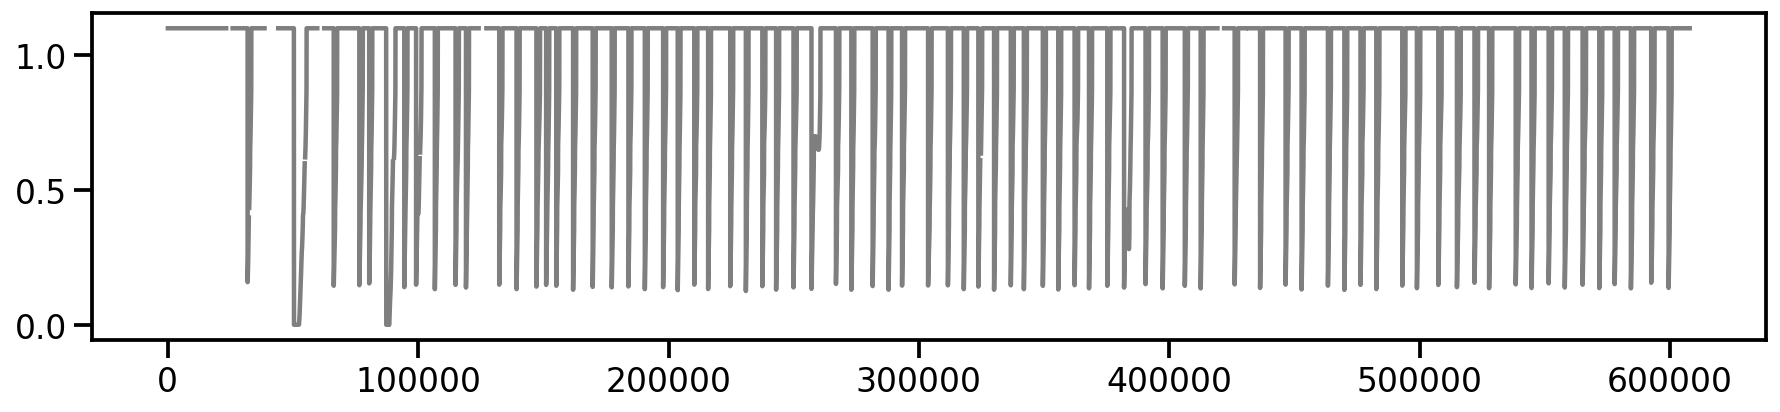

In [20]:
plt.figure(figsize=(15, 3))
plt.plot(
    np.arange(0, len(data["position_info"]["task_phase"])),
    data["position_info"]["task_phase"],
    color="black",
    alpha=0.5,
)
# plt.xlim(10000, 100000)

In [21]:
decode_what = "task_phase"

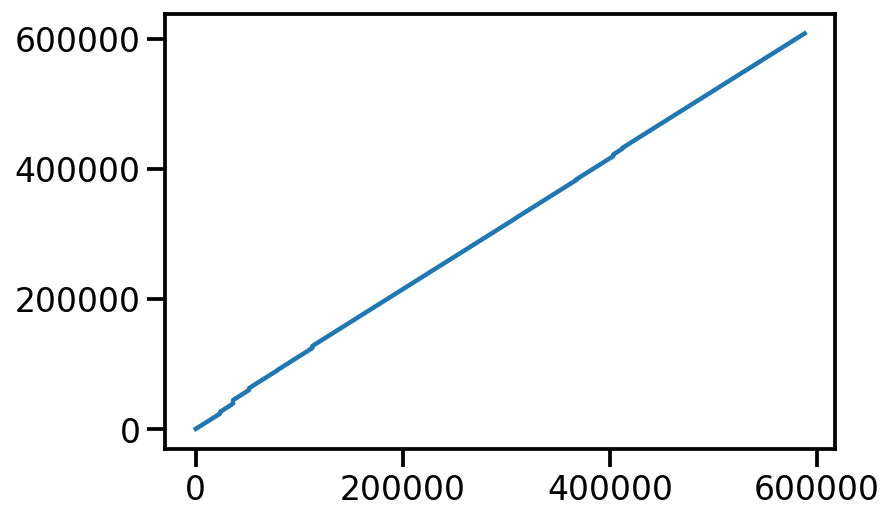

In [22]:
plt.figure()
plt.plot([i for i, k in enumerate(data["position_info"][decode_what].notnull()) if k])

In [23]:
valid_train_index = [
    i for i, k in enumerate(data["position_info"][decode_what].notnull()) if k
]

In [24]:
# Scale task phase by 300
scale_factor = 300
data["position_info"]["task_phase"] = data["position_info"]["task_phase"].apply(
    lambda x: x * scale_factor
)

In [ ]:
from replay_trajectory_classification import SortedSpikesClassifier
from sklearn.model_selection import KFold
from src.parameters import EDGE_ORDER, EDGE_SPACING

os.chdir(
    "/stelmo/jguidera/decoding/clusterless_decoding/jg_clusterless_decoding/notebooks/"
)

decode_what = "task_phase"
areas = data["neuron_info"].area.unique()
state_names = ["Continuous", "Fragmented"]

# Get non-null entries for training. Important for task phase decoding.
pos_not_null = data["position_info"][data["position_info"][decode_what].notnull()]

if decode_what == "task_phase":
    pos_use = pos_not_null
else:
    pos_use = data["position_info"]

for area in ["OFC"]:  # areas:
    logging.info(f"Decoding {area}...")

    cv = KFold()
    results = []

    neuron_id = data["neuron_info"].loc[data["neuron_info"].area == area].neuron_id
    spikes = data["spikes"].loc[:, neuron_id]

    for fold_ind, (train, test) in enumerate(cv.split(data["position_info"].index)):
        logging.info(f"Fitting Fold #{fold_ind + 1}...")
        classifier = SortedSpikesClassifier(**classifier_parameters)

        # use only non-null values for training
        train = list(set(train) & set(valid_train_index))

        classifier.fit(
            position=data["position_info"].iloc[train][
                decode_what
            ],  # .linear_position,
            spikes=spikes.iloc[train],
            track_graph=data["track_graph"],
            edge_order=EDGE_ORDER,
            edge_spacing=EDGE_SPACING,
        )

        logging.info("Predicting posterior...")
        results.append(
            classifier.predict(
                spikes.iloc[test],
                time=data["position_info"].iloc[test].index / np.timedelta64(1, "s"),
                state_names=state_names,
            )
        )
        classifier.save_model(
            f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}_"
            f"sortedspikes_{area}_model_fold{fold_ind}_{decode_what}.pkl"
        )

    # concatenate cv classifier results
    results = xr.concat(results, dim="time")

    results.to_netcdf(
        f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}_"
        f"sortedspikes_{area}_" + decode_what + "_results.nc"
    )

logging.info("Done...\n\n")

19-Feb-21 09:36:48 Decoding OFC...
19-Feb-21 09:36:49 Fitting Fold #1...
19-Feb-21 09:36:50 Fitting initial conditions...
19-Feb-21 09:36:51 Fitting state transition...
19-Feb-21 09:36:51 Fitting place fields...
19-Feb-21 09:43:23 Predicting posterior...
19-Feb-21 09:47:12 Fitting Fold #2...
19-Feb-21 09:47:13 Fitting initial conditions...
19-Feb-21 09:47:13 Fitting state transition...
19-Feb-21 09:47:14 Fitting place fields...
19-Feb-21 09:54:43 Predicting posterior...
19-Feb-21 09:58:36 Fitting Fold #3...
19-Feb-21 09:58:38 Fitting initial conditions...
19-Feb-21 09:58:38 Fitting state transition...
19-Feb-21 09:58:38 Fitting place fields...


In [ ]:
client.close()

In [ ]:
import copy

In [ ]:
def plot_classifier_time_slice_sorted_spikes_multiple_decodes(
    time_slice,
    results_dict,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 10),
    cmap_list=["bone_r", "bone_r", "bone_r"],
):

    t = data["position_info"].index / np.timedelta64(1, "s")

    fig, axes = plt.subplots(
        nrows=len(results_dict) + 1,
        ncols=1,
        figsize=figsize,
        sharex=True,
        constrained_layout=True,
        gridspec_kw={"height_ratios": [3] * len(results_dict) + [1]},
    )

    # decodes and position
    for index_temp, results_temp in enumerate(results_dict.values()):  # for each decode

        cmap = copy.copy(plt.cm.get_cmap(cmap_list[index_temp]))
        cmap.set_bad(color="lightgrey", alpha=1.0)

        posterior = (
            results_temp[posterior_type].sum("state", skipna=False).sel(time=time_slice)
        )

        (
            posterior.plot(
                x="time",
                y="position",
                robust=True,
                ax=axes[index_temp],
                cmap=cmap,
                vmin=0.0,
            )
        )

        axes[index_temp].scatter(
            data["position_info"].reset_index().set_index(t).loc[time_slice].index,
            data["position_info"]
            .reset_index()
            .set_index(t)
            .loc[time_slice]
            .linear_position,
            color="magenta",
            s=1,
            alpha=1,
            zorder=100,
        )
    axes[0].set_xlabel("")

    axes[0].set_ylabel("Position [cm]")

    axes[0].set_title("Posterior")

    # speed
    axes[3].fill_between(
        data["position_info"].reset_index().set_index(t).loc[time_slice].index,
        data["position_info"]
        .reset_index()
        .set_index(t)
        .loc[time_slice]
        .speed.values.squeeze(),
        color="lightgrey",
        linewidth=1,
        alpha=0.5,
    )
    axes[3].set_title("Speed")
    axes[3].set_ylabel("Speed [cm / s]")
    axes[3].set_xlabel("Time [s]")
    sns.despine()

In [ ]:
from src.visualization import plot_classifier_time_slice_sorted_spikes
import xarray as xr

results_dict = dict()  # initialize dictionary
for region_temp in ["CA1", "mPFC", "OFC"]:  # for each brain region
    results_dict[region_temp] = xr.open_dataset(
        "peanut_14_04_sortedspikes_" + region_temp + "_results.nc"
    )

time = results.time.values

time_ind = np.arange(0, len(time), 20_000)
time_ind = np.append(time_ind, len(time) - 1)

for start_ind, end_ind in zip(time_ind[:-1], time_ind[1:]):
    time_slice = slice(time[start_ind], time[end_ind])

    plot_classifier_time_slice_sorted_spikes_multiple_decodes(
        time_slice=time_slice,
        results_dict=results_dict,
        data=data,
        posterior_type="acausal_posterior",
        figsize=(30, 10),
        cmap_list=["bone_r", "bone_r", "bone_r"],
    )

In [ ]:
from src.visualization import plot_classifier_time_slice_sorted_spikes
import xarray as xr

results = xr.open_dataset("peanut_14_04_sortedspikes_mPFC_results.nc")
classifier = SortedSpikesClassifier.load_model(
    "peanut_14_04_sortedspikes_mPFC_model_fold0.pkl"
)

time = results.time.values

time_ind = np.arange(0, len(time), 20_000)
time_ind = np.append(time_ind, len(time) - 1)

for start_ind, end_ind in zip(time_ind[:-1], time_ind[1:]):
    time_slice = slice(time[start_ind], time[end_ind])

    plot_classifier_time_slice_sorted_spikes(
        time_slice,
        classifier,
        results,
        data,
        posterior_type="acausal_posterior",
        figsize=(30, 15),
    )

In [ ]:
from src.visualization import plot_classifier_time_slice_sorted_spikes
import xarray as xr

results = xr.open_dataset(f"peanut_14_04_sortedspikes_CA1_{decode_what}_results.nc")
classifier = SortedSpikesClassifier.load_model(
    f"peanut_14_04_sortedspikes_CA1_model_fold0_{decode_what}.pkl"
)

time = results.time.values

time_ind = np.arange(0, len(time), 20_000)
time_ind = np.append(time_ind, len(time) - 1)

for start_ind, end_ind in zip(time_ind[:-1], time_ind[1:]):
    time_slice = slice(time[start_ind], time[end_ind])

    plot_classifier_time_slice_sorted_spikes(
        time_slice,
        classifier,
        results,
        data,
        posterior_type="acausal_posterior",
        figsize=(30, 15),
        decode_what=decode_what,
    )

In [ ]:
from src.visualization import plot_classifier_time_slice_sorted_spikes
import xarray as xr

results = xr.open_dataset("peanut_14_04_sortedspikes_OFC_results.nc")
classifier = SortedSpikesClassifier.load_model(
    "peanut_14_04_sortedspikes_OFC_model_fold0.pkl"
)

time = results.time.values

time_ind = np.arange(0, len(time), 20_000)
time_ind = np.append(time_ind, len(time) - 1)

for start_ind, end_ind in zip(time_ind[:-1], time_ind[1:]):
    time_slice = slice(time[start_ind], time[end_ind])

    plot_classifier_time_slice_sorted_spikes(
        time_slice,
        classifier,
        results,
        data,
        posterior_type="acausal_posterior",
        figsize=(30, 15),
    )